# Case Study

Cardiovascular disease (CVDs) atau penyakit jantung merupakan penyebab kematian nomor satu secara global dengan 17,9 juta kasus kematian setiap tahunnya. Penyakit jantung disebabkan oleh hipertensi, obesitas, dan gaya hidup yang tidak sehat. Deteksi dini penyakit jantung perlu dilakukan pada kelompok risiko tinggi agar dapat segera mendapatkan penanganan dan pencegahan. Sehingga tujuan bisnis yang ingin dicapai yaitu membentuk model prediksi penyakit jantung pada pasien berdasarkan feature-feature yang ada untuk membantu para dokter melakukan diagnosa secara tepat dan akurat. Harapannya agar penyakit jantung dapat ditangani lebih awal. Dengan demikian, diharapkan juga angka kematian akibat penyakit jantung dapat turun.

# Problem Statement

Masalah yang ingin kita selesaikan adalah melakukan diagnosa pasien penderita penyakit jantung secara tepat dan akurat. Perlu dilakukan analisis faktor-faktor penyebab dan gejala penyakit jantung pada pasien.

# About Datasets

Dataset yang digunakan adalah data Heart Disease yang diunduh dari UCI ML: https://archive.ics.uci.edu/dataset/45/heart+disease

Dataset yang digunakan ini berasal dari tahun 1988 dan terdiri dari empat database: Cleveland, Hungaria, Swiss, dan Long Beach V. Bidang "target" mengacu pada adanya penyakit jantung pada pasien. Ini adalah bilangan bulat bernilai 0 = tidak ada penyakit dan 1 = penyakit.

Dataset heart disease terdiri dari 1025 baris data dan 13 atribut + 1 target. Dataset ini memiliki 14 kolom yaitu:

1. age: variabel ini merepresentasikan usia pasien yang diukur dalam tahun.
2. sex: variabel ini merepresentasikan jenis kelamin pasien dengan nilai 1 untuk laki-laki dan nilai 0 untuk perempuan.
3. cp (Chest pain type): variabel ini merepresentasikan jenis nyeri dada yang dirasakan oleh pasien dengan 4 nilai kategori yang mungkin: nilai 1 mengindikasikan nyeri dada tipe angina, nilai 2 mengindikasikan nyeri dada tipe nyeri tidak stabil, nilai 3 mengindikasikan nyeri dada tipe nyeri tidak stabil yang parah, dan nilai 4 mengindikasikan nyeri dada yang tidak terkait dengan masalah jantung.
4. trestbps (Resting blood pressure): variabel ini merepresentasikan tekanan darah pasien pada saat istirahat, diukur dalam mmHg (milimeter air raksa (merkuri)).
5. chol (Serum cholestoral): variabel ini merepresentasikan kadar kolesterol serum dalam darah pasien, diukur dalam mg/dl (miligram per desiliter).
6. fbs (Fasting blood sugar): variabel ini merepresentasikan kadar gula darah pasien saat puasa (belum makan) dengan nilai 1 jika kadar gula darah > 120 mg/dl dan nilai 0 jika tidak.
7. restecg (Resting electrocardiographic results): variabel ini merepresentasikan hasil elektrokardiogram pasien saat istirahat dengan 3 nilai kategori yang mungkin: nilai 0 mengindikasikan hasil normal, nilai 1 mengindikasikan adanya kelainan gelombang ST-T, dan nilai 2 mengindikasikan hipertrofi ventrikel kiri.
8. thalach (Maximum heart rate achieved): variabel ini merepresentasikan detak jantung maksimum yang dicapai oleh pasien selama tes olahraga, diukur dalam bpm (denyut per menit).
9. exang (Exercise induced angina): variabel ini merepresentasikan apakah pasien mengalami angina (nyeri dada) yang dipicu oleh aktivitas olahraga, dengan nilai 1 jika ya dan nilai 0 jika tidak.
10. oldpeak: variabel ini merepresentasikan seberapa banyak ST segmen menurun atau depresi saat melakukan aktivitas fisik dibandingkan saat istirahat.
11. slope: variabel ini merepresentasikan kemiringan segmen ST pada elektrokardiogram (EKG) selama latihan fisik maksimal dengan 3 nilai kategori.
12. ca (Number of major vessels): variabel ini merepresentasikan jumlah pembuluh darah utama (0-3) yang terlihat pada pemeriksaan flourosopi.
13. thal: variabel ini merepresentasikan hasil tes thalium scan dengan 3 nilai kategori yang mungkin:
 - thal 1: menunjukkan kondisi normal.
 - thal 2: menunjukkan adanya defek tetap pada thalassemia.
 - thal 3: menunjukkan adanya defek yang dapat dipulihkan pada thalassemia.
14. target: 0 = tidak ada penyakit dan 1 = penyakit.

# Project Goals

Tujuan dari Capstone adalah melakukan data preprocessing termasuk Exploratory Data Analysis untuk menggali insight dari data pasien penderita penyakit jantung hingga proses feature selection dan dimensionality reduction. Hasil akhir yang ingin dicapai yaitu mendapatkan insight data penderita penyakit jantung dan data yang siap untuk dimodelkan pada tahap selanjutnya.

# Metrics

Tahap untuk mendukung dalam menyelesaikan problem statement yang ada dan akan digunakan untuk memantau kinerja solusi. Berikut metrics yang termasuk :
1. Jumlah Penderita penyakit jantung
2. Proporsi pasien pria dan wanita yang mengalami penyakit jantung
3. Usia rata rata pasien yang terkena penyakit jantung
4. Korelasi penyakit jantung terhadap tiap variabel yang ada pada dataset (kolestrol, tekanan darah, jenis kelamin, kadar gula darah, detak jantung maksumun selama tes latihan, dan variabel lainnya)

# Preparation

Disini kita akan menyiapkan libraries yang diperlukan dan dataset berdasarkan link: https://storage.googleapis.com/dqlab-dataset/heart_disease.csv. Dalam rangka mengetahui tentang dataset, kita akan melihat overview.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import random
import seaborn as sns
from scipy.stats import pearsonr, jarque_bera
import matplotlib.pyplot as plt
import pickle
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [3]:
# Memuat dataset Heart Disease UCI ML
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
# column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(url)

# Data Preprocessing

### Data Lookup

Melihat sebagian data, kolom data, ukuran data, hingga persebaran data

In [7]:
# Menampilkan lima baris teratas dan terbawah
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
# Melihat informasi dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
# Melihat persebaran data
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Melihat uniqueness data
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

### Data Quality

Disini kita akan melakukan pengecekan karakter, handling missing value, outlier, duplikat dan data imbalance serta skewness.

In [14]:
# Melakukan handling kolom menjadi kategorikal
lst=['sex','cp','fbs','restecg','exang','slope','thal','ca','target']
data[lst] = data[lst].astype(object)

# Melihat perubahan
data.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

In [15]:
# Pelabelan data categorical
data['sex'] = data['sex'].replace({1: 'Male',
                                   0: 'Female'})
data['cp'] = data['cp'].replace({0: 'typical angina',
                                 1: 'atypical angina',
                                 2: 'non-anginal pain',
                                 3: 'asymtomatic'})
data['fbs'] = data['fbs'].replace({0: 'No',
                                   1: 'Yes'})
data['restecg'] = data['restecg'].replace({0: 'probable or definite left ventricular hypertrophy',
                                           1:'normal',
                                           2: 'ST-T Wave abnormal'})
data['exang'] = data['exang'].replace({0: 'No',
                                       1: 'Yes'})
data['slope'] = data['slope'].replace({0: 'downsloping',
                                       1: 'flat',
                                       2: 'upsloping'})
data['thal'] = data['thal'].replace({1: 'normal',
                                     2: 'fixed defect',
                                     3: 'reversable defect'})
data['ca'] = data['ca'].replace({0: 'Number of major vessels: 0',
                                 1: 'Number of major vessels: 1',
                                 2: 'Number of major vessels: 2',
                                 3: 'Number of major vessels: 3'})
data['target'] = data['target'].replace({0: 'No disease',
                                         1: 'Disease'})

In [16]:
# Pisahkan numerical dan categorical
numerical_col = data.select_dtypes(exclude='object')
categorical_col = data.select_dtypes(exclude=['int64','float64'])

In [19]:
# Pengecekan karakter dari data kategorikal
for i in categorical_col:
    print("Kolom {}: {}".format(i, data[i].unique()))
    print()

Kolom sex: ['Male' 'Female']

Kolom cp: ['typical angina' 'atypical angina' 'non-anginal pain' 'asymtomatic']

Kolom fbs: ['No' 'Yes']

Kolom restecg: ['normal' 'probable or definite left ventricular hypertrophy'
 'ST-T Wave abnormal']

Kolom exang: ['No' 'Yes']

Kolom slope: ['upsloping' 'downsloping' 'flat']

Kolom ca: ['Number of major vessels: 2' 'Number of major vessels: 0'
 'Number of major vessels: 1' 'Number of major vessels: 3' 4]

Kolom thal: ['reversable defect' 'fixed defect' 'normal' 0]

Kolom target: ['No disease' 'Disease']



Terdapat dua feature yang mengalami kesalahan penulisan:
1. Feature 'CA': Memiliki 5 nilai dari rentang 0-4, maka dari itu nilai 4 diubah menjadi NaN (karena seharusnya tidak ada)
2. Feature 'thal': Memiliki 4 nilai dari rentang 0-3, maka dari itu nulai 0 diubah menjadi NaN (karena seharusnya tidak ada)

In [21]:
# Melihat jumlah nilai unik dari kolom 'ca'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
4                              18
Name: count, dtype: int64

Bahwa ada data di kolom 'ca' yang bernilai '4' sebanyak 18. Padahal nilai '4' harusnya tidak ada.

In [24]:
# Menemukan baris dengan kolom 'ca' bernilai '4'
data[data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
52,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
83,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
128,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
208,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
242,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
290,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
340,38,Male,non-anginal pain,138,175,No,normal,173,No,0.0,upsloping,4,fixed defect,Disease
348,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease
417,52,Male,non-anginal pain,138,223,No,normal,169,No,0.0,upsloping,4,fixed defect,Disease
428,43,Male,typical angina,132,247,Yes,probable or definite left ventricular hypertrophy,143,Yes,0.1,flat,4,reversable defect,No disease


In [25]:
# Melihat jumlah nilai unik dari kolom 'thal'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
0                      7
Name: count, dtype: int64

Bahwa ada data di kolom 'thal' yang bernilai '0' sebanyak 7. Padahal nilai '0' harusnya tidak ada.

In [29]:
# Menemukan baris dengan kolom 'thal' bernilai '0'
data[data['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
319,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
329,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
359,53,Female,non-anginal pain,128,216,No,probable or definite left ventricular hypertrophy,115,No,0.0,upsloping,Number of major vessels: 0,0,Disease
686,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
734,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease
893,52,Male,typical angina,128,204,Yes,normal,156,Yes,1.0,flat,Number of major vessels: 0,0,No disease


### Handling Unexpected Value

In [33]:
# Ganti kolom 'ca' yang bernilai '4' menjadi NaN
data.loc[data['ca']==4, 'ca'] = np.nan

In [34]:
# Cek kembali apakah masih ada data kolom 'ca' yang bernilai '4'
data['ca'].value_counts()

ca
Number of major vessels: 0    578
Number of major vessels: 1    226
Number of major vessels: 2    134
Number of major vessels: 3     69
Name: count, dtype: int64

In [35]:
# Ganti kolom 'thal' yang bernilai '0' menjadi NaN
data.loc[data['thal']==0, 'thal'] = np.nan

In [38]:
# Cek kembali apakah masih ada data kolom 'thal' yang bernilai '0'
data['thal'].value_counts()

thal
fixed defect         544
reversable defect    410
normal                64
Name: count, dtype: int64

### Handling Missing Value

In [44]:
# Check missing values
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64


In [45]:
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data['ca'] = data['ca'].fillna(modus_ca)

In [46]:
# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data['thal'] = data['thal'].fillna(modus_thal)

In [48]:
# Check missing values kembali
print("Hasil missing value:\n", data.isnull().sum())

Hasil missing value:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### Handling Duplicates Record

In [54]:
# Memeriksa duplikat data
print(f'data duplikat: {data.duplicated().sum()}')

data duplikat: 723


In [56]:
# Menampilkan baris data duplicate
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,Female,atypical angina,118,210,No,normal,192,No,0.7,upsloping,Number of major vessels: 0,fixed defect,Disease
31,50,Female,atypical angina,120,244,No,normal,162,No,1.1,upsloping,Number of major vessels: 0,fixed defect,Disease
43,46,Male,typical angina,120,249,No,probable or definite left ventricular hypertrophy,144,No,0.8,upsloping,Number of major vessels: 0,reversable defect,No disease
55,55,Male,typical angina,140,217,No,normal,111,Yes,5.6,downsloping,Number of major vessels: 0,reversable defect,No disease
61,66,Female,non-anginal pain,146,278,No,probable or definite left ventricular hypertrophy,152,No,0.0,flat,Number of major vessels: 1,fixed defect,Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,atypical angina,140,221,No,normal,164,Yes,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease
1021,60,Male,typical angina,125,258,No,probable or definite left ventricular hypertrophy,141,Yes,2.8,flat,Number of major vessels: 1,reversable defect,No disease
1022,47,Male,typical angina,110,275,No,probable or definite left ventricular hypertrophy,118,Yes,1.0,flat,Number of major vessels: 1,fixed defect,No disease
1023,50,Female,typical angina,110,254,No,probable or definite left ventricular hypertrophy,159,No,0.0,upsloping,Number of major vessels: 0,fixed defect,Disease


Berdasarkan output diatas, kamu perlu melakukan drop duplikat data agar tidak ada data yang duplikat dalam dataset.

In [59]:
# Menghapus data duplikat
data.drop_duplicates(keep='first',inplace=True)

# Memeriksa ulang duplikat data
data.duplicated().sum()

0

**Export Data**

Data setelah dilakukan data cleaning seperti unexpected and missing value, duplicates value

In [ ]:
data.to_csv(r'Datasets/heartdisease_cleansed1.csv', index=False)

In [64]:
data_cleansed1 = pd.read_csv(r'dataset/heartdisease_cleansed1.csv')
data_cleansed1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,Female,non-anginal pain,120,211,No,probable or definite left ventricular hypertrophy,115,No,1.5,flat,Number of major vessels: 0,fixed defect,Disease
298,44,Female,non-anginal pain,108,141,No,normal,175,No,0.6,flat,Number of major vessels: 0,fixed defect,Disease
299,52,Male,typical angina,128,255,No,normal,161,Yes,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
300,59,Male,asymtomatic,160,273,No,probable or definite left ventricular hypertrophy,125,No,0.0,upsloping,Number of major vessels: 0,fixed defect,No disease


### Handling Outliers

Selanjutnya kita akan menampilkan outliers dan menghapus data yang outlier.

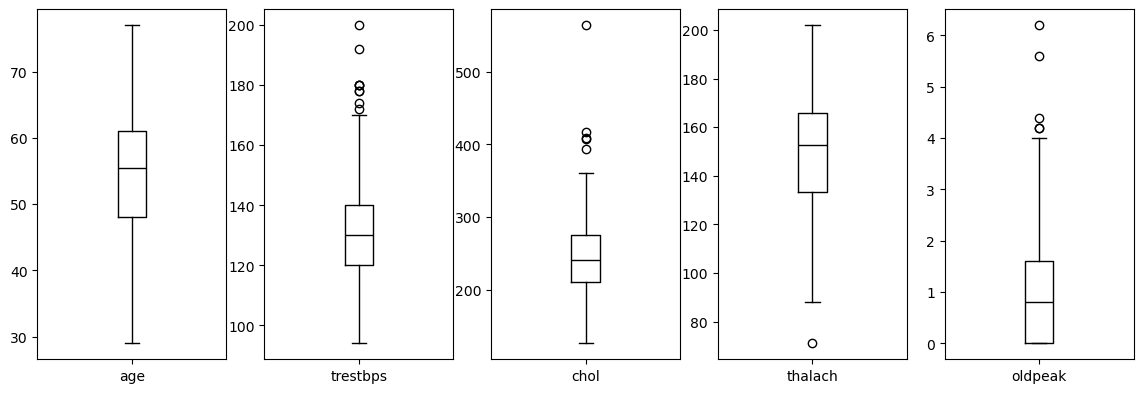

In [66]:
#Menampilkan boxplot untuk melihat outliers data numerik
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

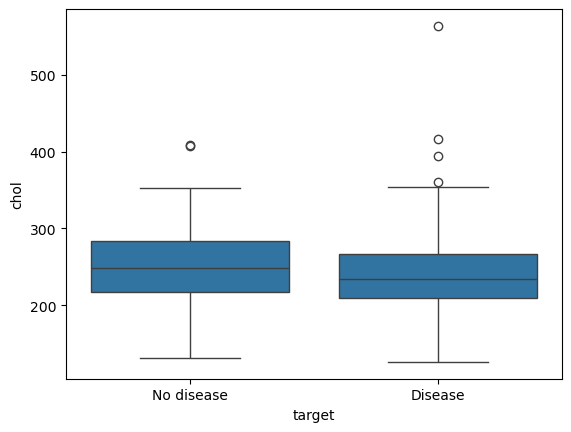

In [67]:
# Menampilkan data berdasarkan target untuk feature chol
sns.boxplot(x=data['target'],y=data['chol'],data=data)
plt.show()

Data yang outliers terletak pada data non-categorical atau data continuous yaitu: 'age', 'trestbps', 'chol', 'thalach', dan 'oldpeak'

In [69]:
#Mencari tahu data yang outliers dengan mendefinisikan fungsi
continous_features = ['age', 'chol', 'thalach', 'oldpeak']
def outliers(data_out, drop=False):
    for each_feature in data_out.columns:
        if each_feature in continous_features:  # Memeriksa apakah kolom adalah data kontinu
            feature_data = data_out[each_feature]
            Q1 = np.percentile(feature_data, 25.)
            Q3 = np.percentile(feature_data, 75.)
            IQR = Q3 - Q1
            outlier_step = IQR * 1.5
            outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
            if not drop:
                print('For the feature {}, Num of Outliers is {}'.format(each_feature, len(outliers)))
            if drop:
                data_out.drop(outliers, inplace=True, errors='ignore')
                print('Outliers from {} feature removed'.format(each_feature))

outliers(data)

For the feature age, Num of Outliers is 0
For the feature chol, Num of Outliers is 5
For the feature thalach, Num of Outliers is 1
For the feature oldpeak, Num of Outliers is 5


In [70]:
# Menghapus outlier dengan fungsi sebelumnya
outliers(data,drop=True)

Outliers from age feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Melihat informasi dari kategori dari data kategorikal.

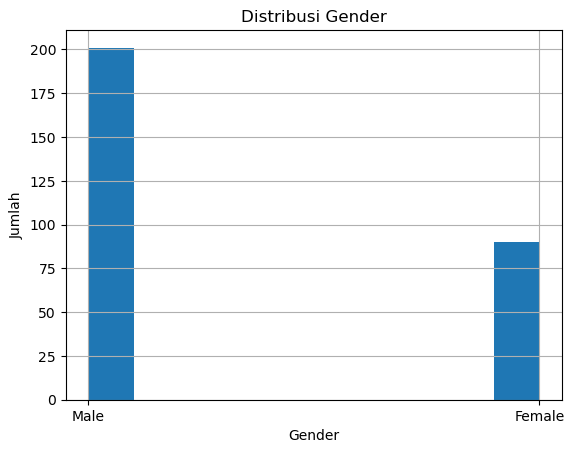

In [76]:
# Jumlah kategori sex pada dataset
data['sex'].hist().plot(kind='bar')
# data['sex'].value_counts().plot(kind='bar')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

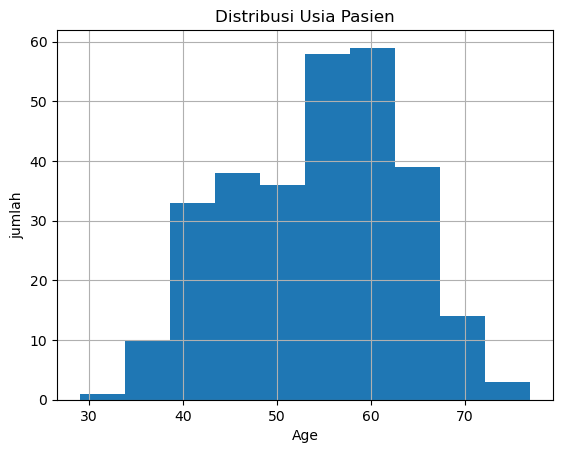

In [77]:
# Jumlah kategori age pada dataset
data['age'].hist().plot(kind='bar')
plt.title('Distribusi Usia Pasien')
plt.xlabel('Age')
plt.ylabel('jumlah')
plt.show()

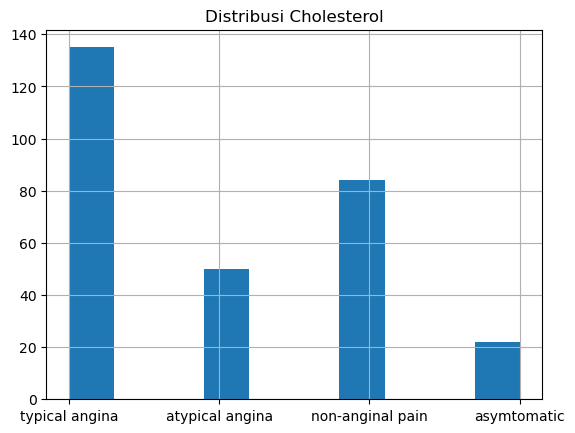

In [79]:
# Jumlah kategori cp pada dataset
data['cp'].hist().plot(kind='bar')
plt.title('Distribusi Cholesterol')
plt.show()

Selanjutnya kita akan melakukan pengecekan data, apakah target imbalance?

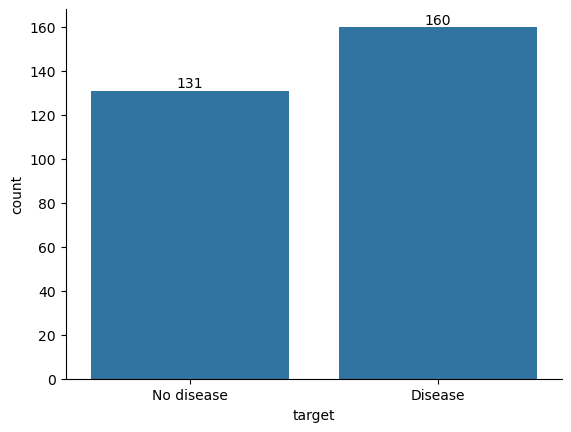

In [83]:
# Memeriksa data imbalance
ax = sns.countplot(x=data['target'],data=data)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

Dapat dilihat pada output diatas data cukup seimbang (balanced), karena tidak terdapat perbedaan yang signifikan dimana terdiagnosa **disease** adalah 55.8% (158 cases), dan lain halnya untuk **no disease** adalah kurang dari 45%.

**Export Data**

Data setelah drop outliers

In [36]:
data.to_csv(r'Datasets/heartdisease_cleansed.csv', index=False)

### Descriptive Statistics

Periksa statistik deskriptif dari kumpulan data (rata-rata, distribusi, dll)

In [87]:
# Melihat statistik deskriptif dari data
data_cleansed1.describe()

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


Dari kumpulan data yang diberikan, dapat dilihat bahwa terdapat 302 entri dan 6 kolom. Berikut adalah statistik deskriptif dari setiap variabel:

1. age: umur pasien, dengan rata-rata (mean) 54.42 tahun dan rentang antara 29 hingga 77 tahun.
2. trestbps: tekanan darah saat istirahat (resting blood pressure) dalam mmHg, dengan rata-rata 131.6 dan rentang antara 94 hingga 200.
3. chol: serum kolesterol dalam mg/dl, dengan rata-rata 246.5 dan rentang antara 126 hingga 564.
4. thalach: detak jantung maksimal yang dicapai selama tes olahraga, dengan rata-rata 149.57 dan rentang antara 71 hingga 202.
5. oldpeak: depresi ST (ST depression) relatif terhadap istirahat yang diinduksi oleh olahraga, dengan rata-rata 1.043 dan rentang antara 0 hingga 6.2.
6. target: variabel target yang menunjukkan keberadaan atau tidaknya penyakit jantung, dengan nilai 0 menunjukkan tidak adanya penyakit dan nilai 1 menunjukkan adanya penyakit.

Selanjutnya kita melihat distribusi data countinous.

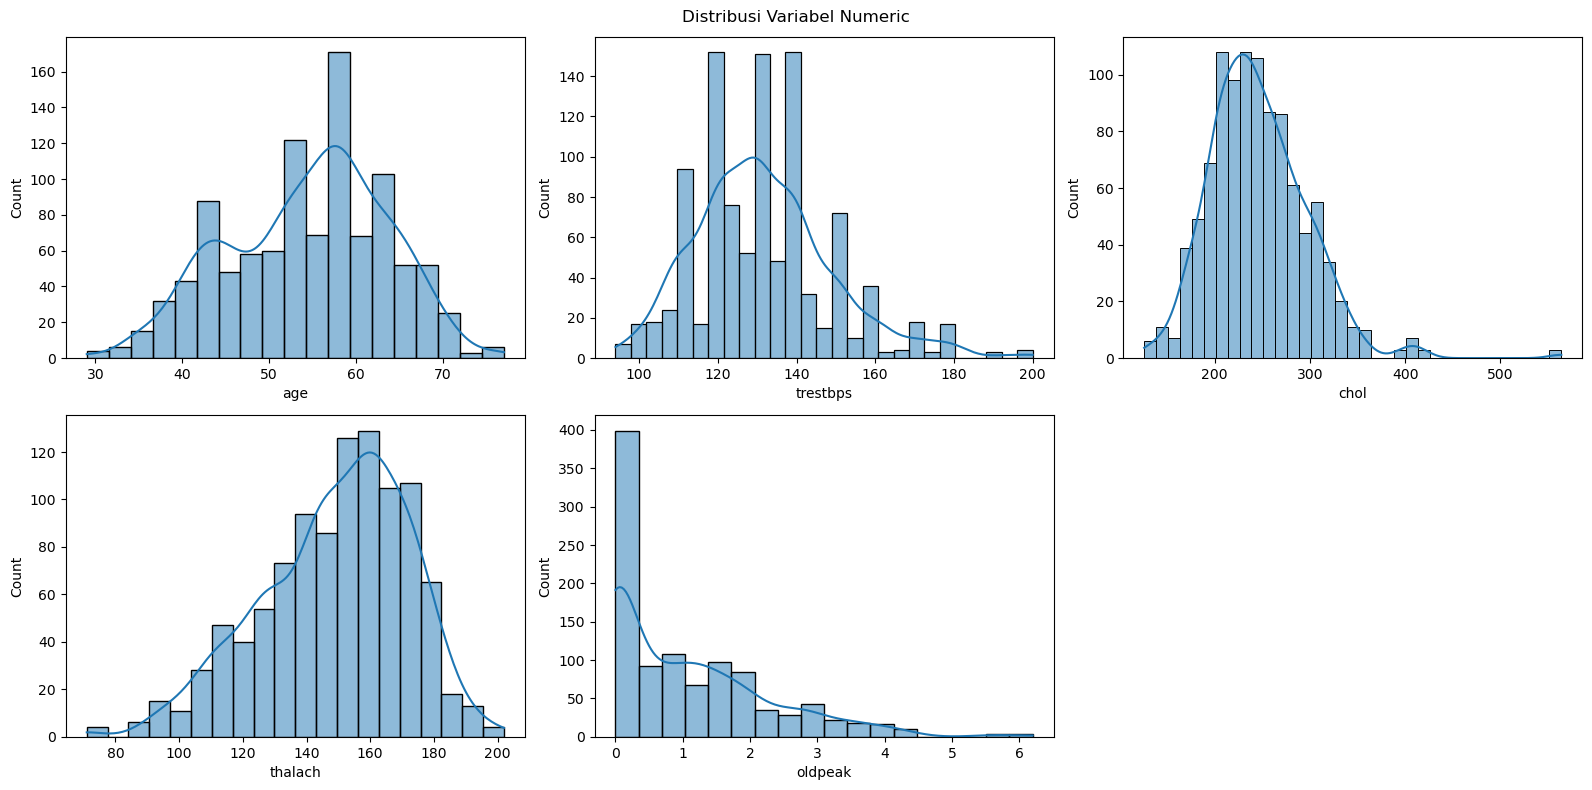

In [90]:
# Memvisualisasikan distribusi variabel numerical
plt.figure(figsize=(16,8))
for index,column in enumerate(numerical_col):
    plt.subplot(2,3,index+1)
    sns.histplot(data=numerical_col,x=column,kde=True)
plt.suptitle('Distribusi Variabel Numeric')
plt.tight_layout(pad = 1.0)
plt.show()

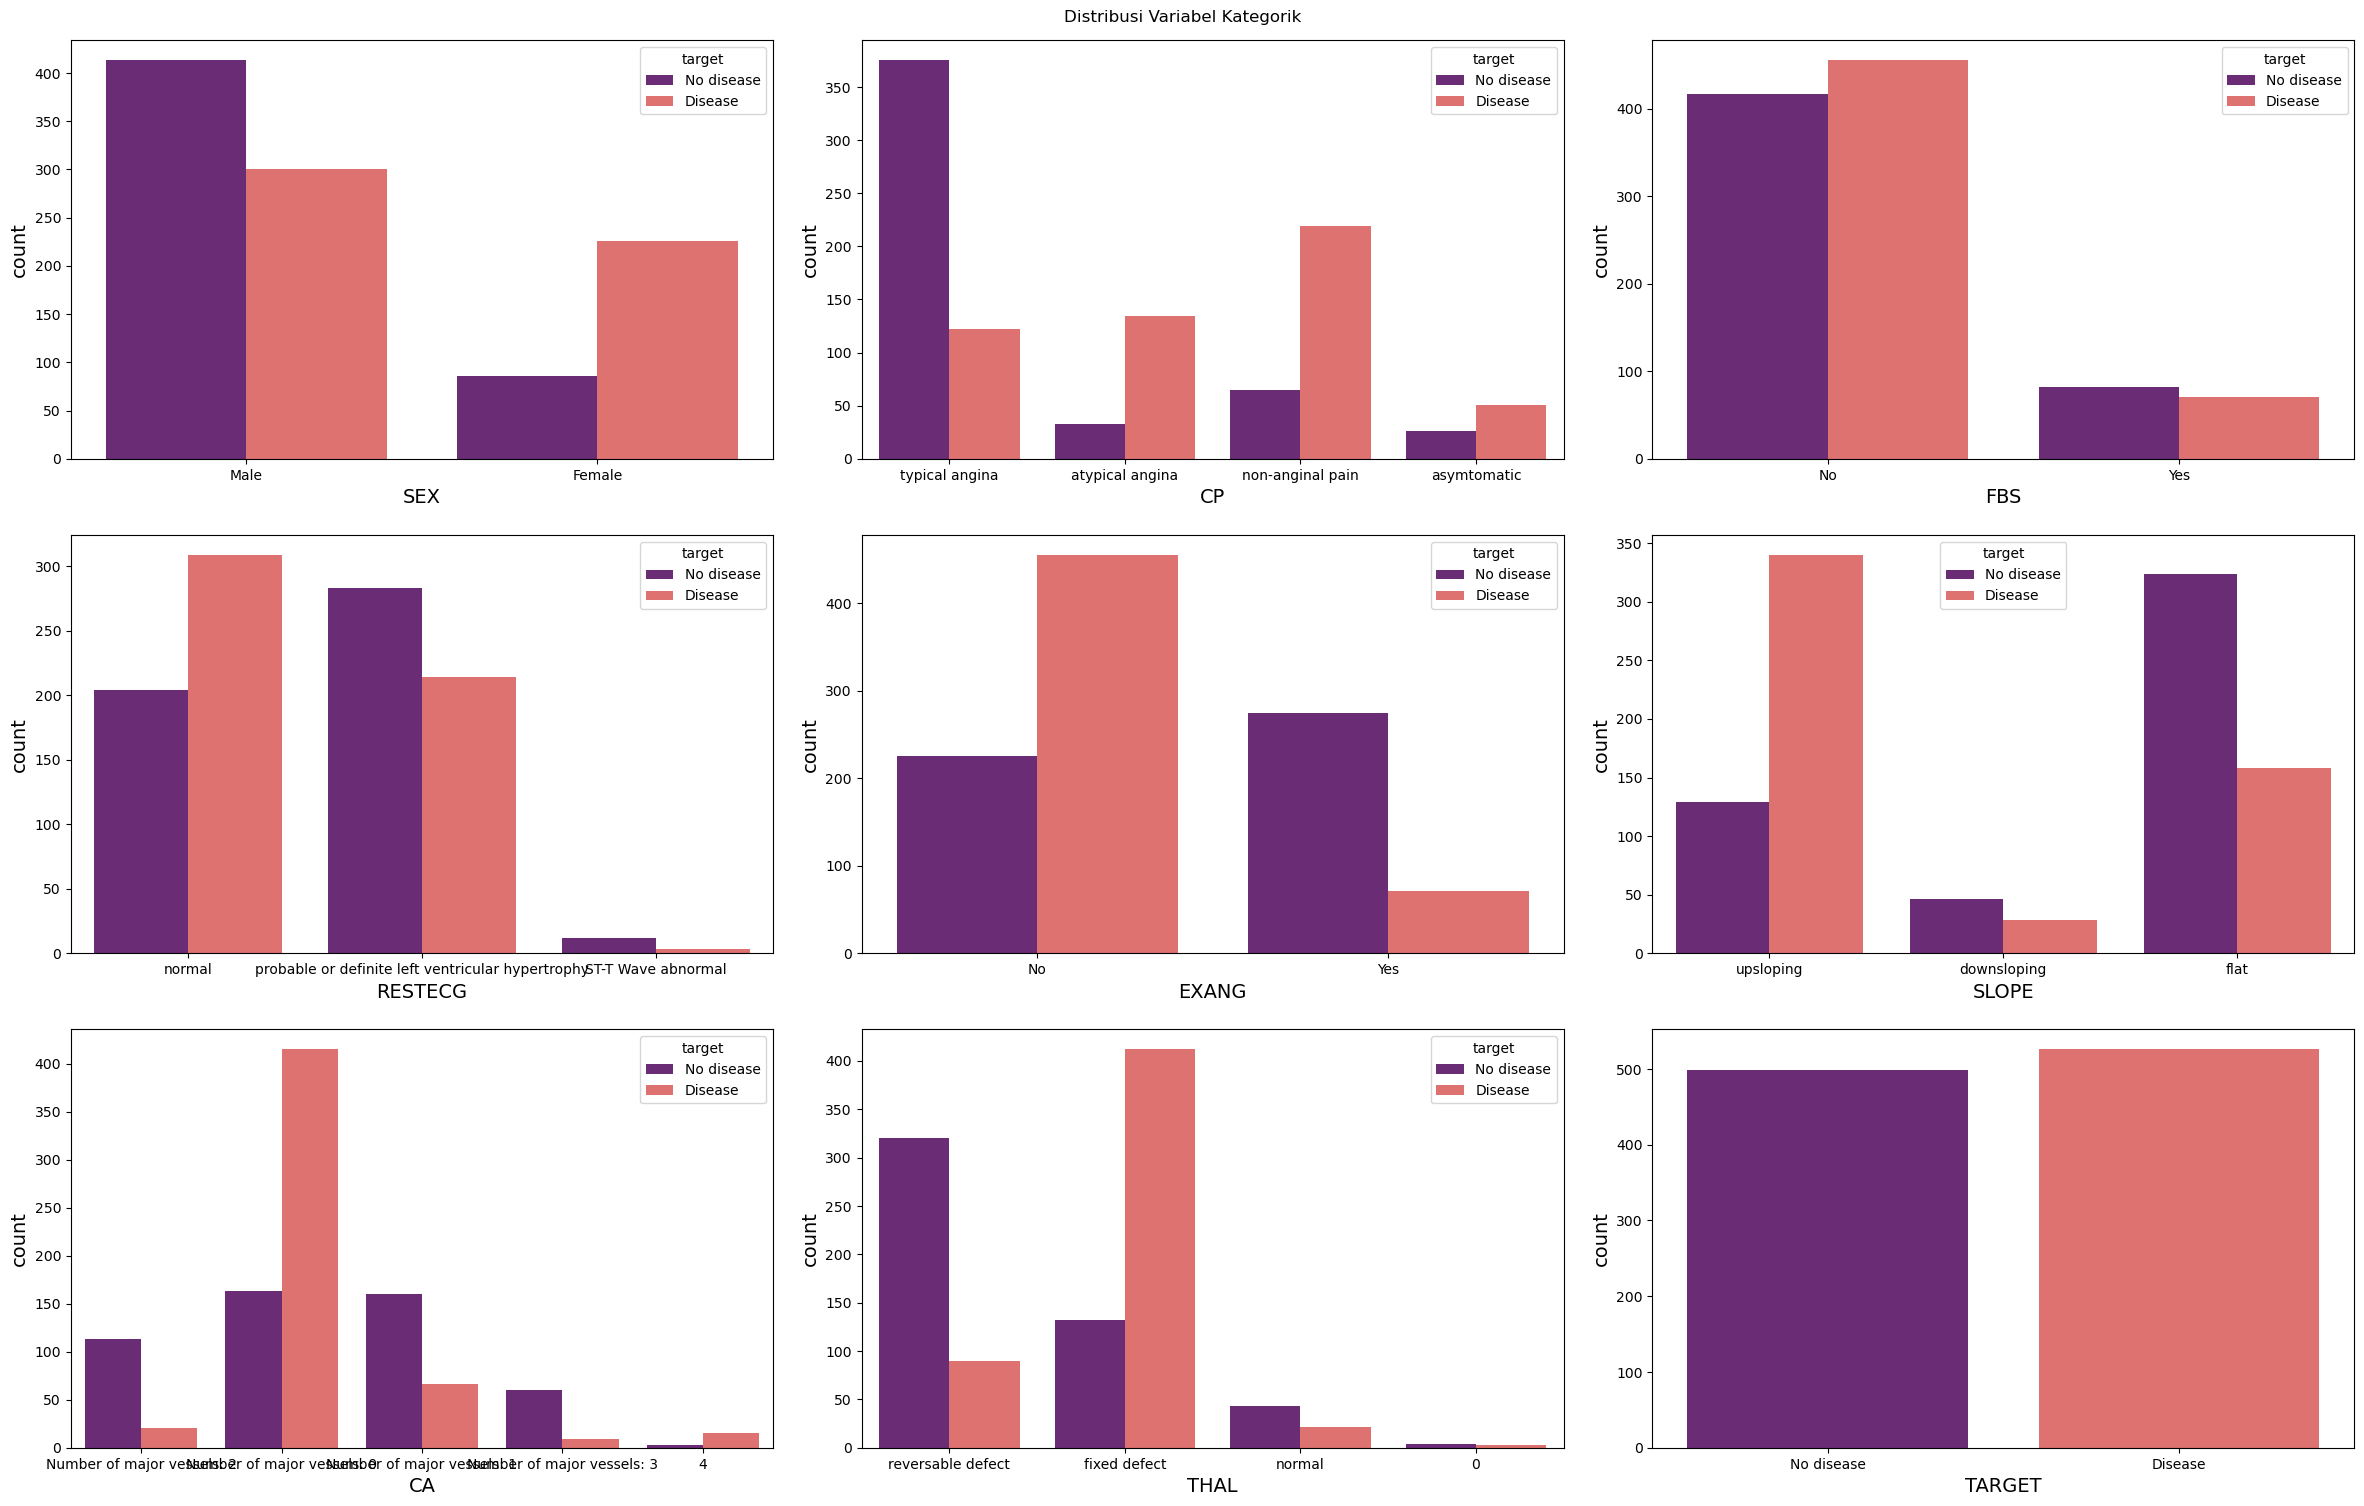

In [92]:
# Memvisualisasikan distribusi variabel kategorikal
plt.figure(figsize=(24,20))
for index, column in enumerate(categorical_col):
    plt.subplot(4, 3, index+1)
    sns.countplot(data=categorical_col,x=column, hue='target', palette='magma')
    plt.xlabel(column.upper(),fontsize=14)
    plt.ylabel("count", fontsize=14)
plt.suptitle('Distribusi Variabel Kategorik')
plt.tight_layout(pad = 2.0)
plt.show()

Melihat korelasi antar feature.

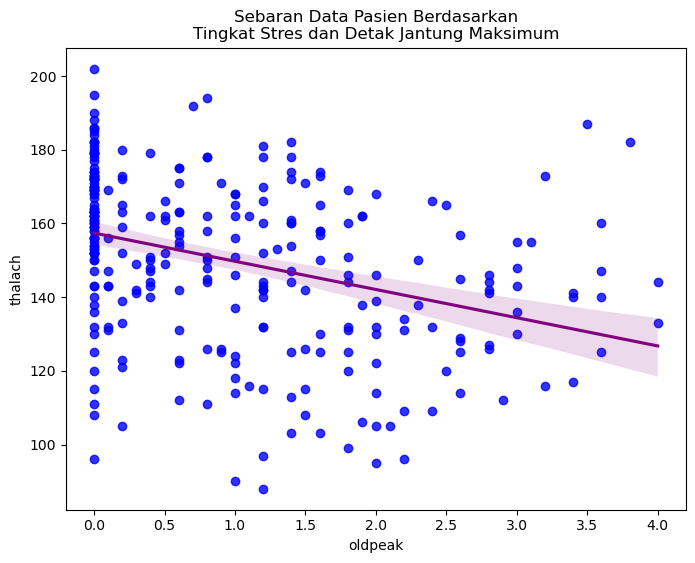

In [95]:
# melihat korelasi tingkat depresi dan detak jantung maksimum
plt.figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'],y=data['thalach'], scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Detak Jantung Maksimum')
plt.show()

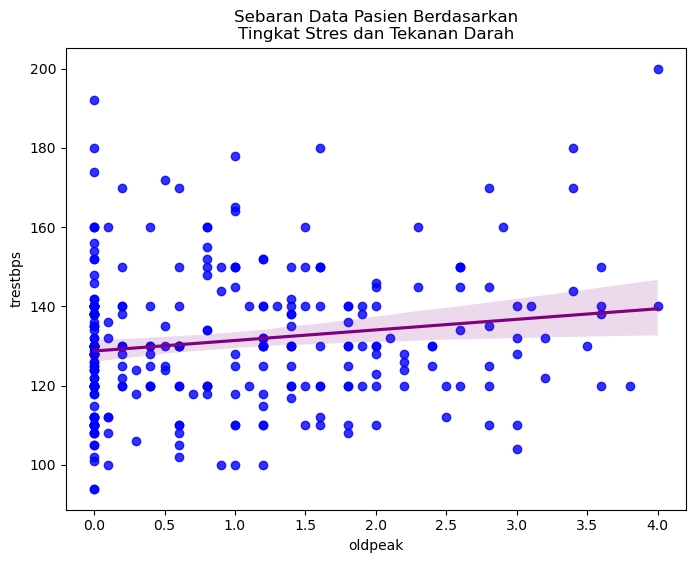

In [96]:
# melihat korelasi tingkat depresi dan tekanan darah
plt.figure(figsize = (8,6))
sns.regplot(x=data['oldpeak'],y=data['trestbps'], scatter_kws = {'color':'blue'}, line_kws = {'color':'purple'})
plt.title('Sebaran Data Pasien Berdasarkan\nTingkat Stres dan Tekanan Darah')
plt.show()

Simpulkan dari grafik yang kamu dapatkan?

In [102]:
df = pd.read_csv(r'dataset/heartdisease_cleansed.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,typical angina,125,212,No,normal,168,No,1.0,upsloping,Number of major vessels: 2,reversable defect,No disease
1,53,Male,typical angina,140,203,Yes,probable or definite left ventricular hypertrophy,155,Yes,3.1,downsloping,Number of major vessels: 0,reversable defect,No disease
2,70,Male,typical angina,145,174,No,normal,125,Yes,2.6,downsloping,Number of major vessels: 0,reversable defect,No disease
3,61,Male,typical angina,148,203,No,normal,161,No,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
4,62,Female,typical angina,138,294,Yes,normal,106,No,1.9,flat,Number of major vessels: 3,fixed defect,No disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,68,Female,non-anginal pain,120,211,No,probable or definite left ventricular hypertrophy,115,No,1.5,flat,Number of major vessels: 0,fixed defect,Disease
287,44,Female,non-anginal pain,108,141,No,normal,175,No,0.6,flat,Number of major vessels: 0,fixed defect,Disease
288,52,Male,typical angina,128,255,No,normal,161,Yes,0.0,upsloping,Number of major vessels: 1,reversable defect,No disease
289,59,Male,asymtomatic,160,273,No,probable or definite left ventricular hypertrophy,125,No,0.0,upsloping,Number of major vessels: 0,fixed defect,No disease


In [104]:
# Label Encoding
cat_col = df.select_dtypes('object')
encoder = {}

for m in cat_col.columns.tolist():
    label_encoder = LabelEncoder()
    df[m] = label_encoder.fit_transform(df[m])
    encoder[m] = label_encoder


# df['sex'] = df['sex'].replace({'Male' : 1,'Female': 0})
# df['cp'] = df['cp'].replace({'typical angina' : 0, 'atypical angina' : 1, 'non-anginal pain' : 2, 'asymtomatic' : 3})
# df['fbs'] = df['fbs'].replace({'No' : 0, 'Yes' : 1})
# df['restecg'] = df['restecg'].replace({'probable or definite left ventricular hypertrophy':0,'normal':1,'ST-T Wave abnormal':2})
# df['exang'] = df['exang'].replace({'No':0,'Yes':1})
# df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1,'upsloping':2})
# df['thal'] = df['thal'].replace({'normal':1, 'fixed defect':2,'reversable defect':3})
# df['ca'] = df['ca'].replace({'Number of major vessels: 0':0, 'Number of major vessels: 1':1,'Number of major vessels: 2':2, 'Number of major vessels: 3':3})
# df['target'] = df['target'].replace({'No disease':0,'Disease':1})

In [106]:
encoder

{'sex': LabelEncoder(),
 'cp': LabelEncoder(),
 'fbs': LabelEncoder(),
 'restecg': LabelEncoder(),
 'exang': LabelEncoder(),
 'slope': LabelEncoder(),
 'ca': LabelEncoder(),
 'thal': LabelEncoder(),
 'target': LabelEncoder()}

In [123]:
cor_matrix = df.corr()
cor_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.075938,0.098051,0.287119,0.177738,0.122130,0.103271,-0.400295,0.114798,0.202572,-0.152354,0.383960,0.123416,0.228199
sex,-0.075938,1.000000,0.028555,-0.050535,-0.141056,0.054131,0.105517,-0.027112,0.137428,0.129683,-0.036620,0.111407,0.392646,0.291647
cp,0.098051,0.028555,1.000000,-0.030217,0.060094,-0.032025,0.053147,-0.334204,0.392596,0.201290,-0.151210,0.217679,0.269613,0.400353
trestbps,0.287119,-0.050535,-0.030217,1.000000,0.156105,0.187043,0.093580,-0.052180,0.074864,0.159376,-0.100984,0.093682,0.116068,0.153099
chol,0.177738,-0.141056,0.060094,0.156105,1.000000,0.008938,0.124835,-0.026966,0.099518,0.010072,0.029677,0.117086,0.002136,0.115931
fbs,0.122130,0.054131,-0.032025,0.187043,0.008938,1.000000,0.079142,-0.019162,0.030287,0.040323,-0.089389,0.158084,0.072161,0.042272
restecg,0.103271,0.105517,0.053147,0.093580,0.124835,0.079142,1.000000,-0.070973,0.081675,0.077662,-0.109118,0.135107,0.016830,0.163927
thalach,-0.400295,-0.027112,-0.334204,-0.052180,-0.026966,-0.019162,-0.070973,1.000000,-0.388073,-0.352555,0.382601,-0.284136,-0.266962,-0.412215
exang,0.114798,0.137428,0.392596,0.074864,0.099518,0.030287,0.081675,-0.388073,1.000000,0.325332,-0.274695,0.150918,0.320874,0.437542
oldpeak,0.202572,0.129683,0.201290,0.159376,0.010072,0.040323,0.077662,-0.352555,0.325332,1.000000,-0.536645,0.247428,0.298742,0.434354


<Axes: >

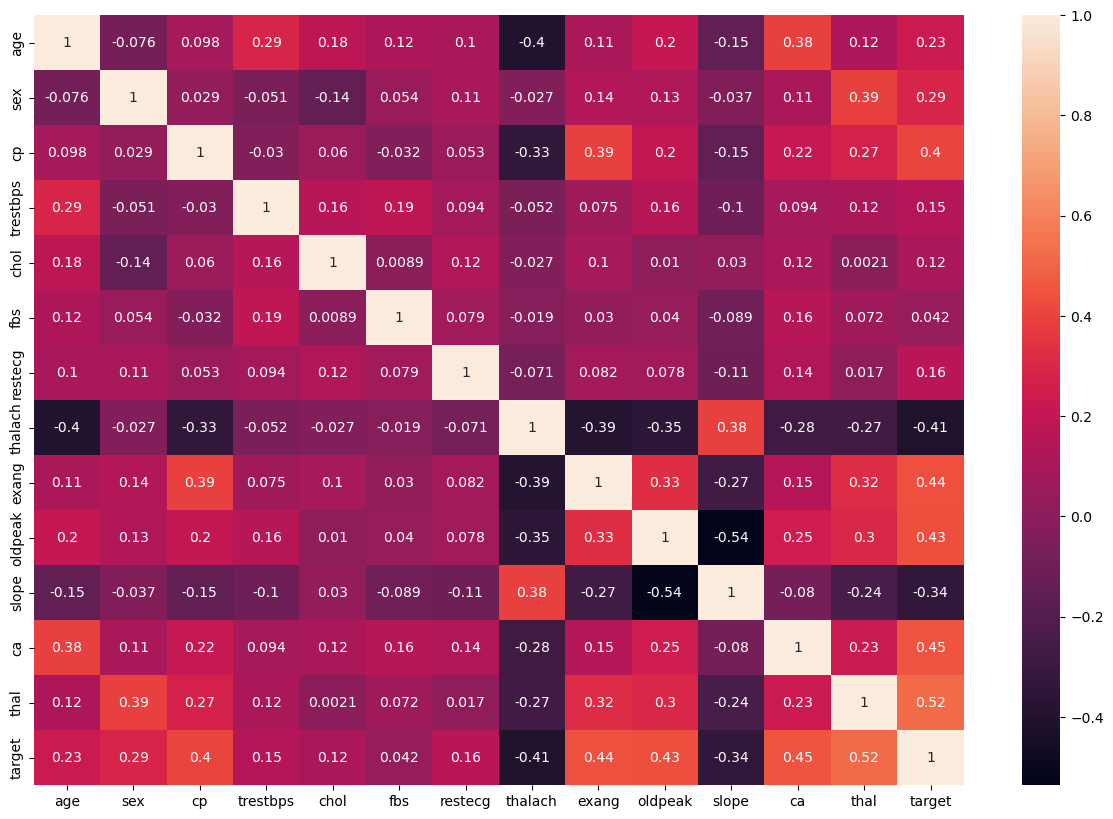

In [125]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

In [129]:
corr_matrix = df.corr()
corr_matrix['target'].sort_values()

thalach    -0.412215
slope      -0.337719
fbs         0.042272
chol        0.115931
trestbps    0.153099
restecg     0.163927
age         0.228199
sex         0.291647
cp          0.400353
oldpeak     0.434354
exang       0.437542
ca          0.453517
thal        0.524397
target      1.000000
Name: target, dtype: float64

### Feature Selection

Korelasi target(penyakit jantung) dengan variabel lainnya. Korelasi positif dengan variabel tertentu berarti semakin tinggi variabel tersebut maka akan semakin tinggi juga kemungkinan terkena penyakit jantung, sedangkan korelasi negatif ialah semakin rendah nilai variabel tersebut maka kemungkinan terkena penyakit jantung lebih tinggi.

1. ca -0.456989 (Korelasi Negatif Kuat)
2. oldpeak -0.434108 (Korelasi Negatif Kuat)
3. exang -0.431599 (Korelasi Negatif Kuat)
4. thal -0.370759 (Korelasi Negatif Kuat)
5. sex -0.318896 (Korelasi Negatif Kuat)
6. age -0.222416 (Korelasi Negatif)
7. trestbps -0.115614 (Korelasi Negatif Lemah)
8. chol -0.0105627 (Korelasi Negatif Lemah)
9. fbs 0.027210 (Korelasi Positif Lemah)
10. restecg 0.171453 (Korelasi Positif Lemah)
11. slope 0.326473 (korelasi Positif Kuat)
12. cp 0.422559 (korelasi Positif Kuat)
13. thalach 0.432211 (korelasi Positif Kuat)

Jadi, bisa disimpulkan faktor yang paling berpengaruh terhadap penyakit jantung ialah, sebagai berikut:

1. ca (semakin banyak major vessels ,maka akan semakin tinggi resiko terkena penyakit jantung)
2. oldpeak (Semakin rendah depresi ST yang disebabkan oleh latihan relatif terhadap istirahat, maka resiko terkena penyakit jantung akan semakin tinggi)
3. exang (Apibila exercise induced angina rendah, maka resiko terkena penyakit jantung akan semakin tinggi)
4. thal(semakin rendah tipe jenis defek jantung, maka resiko terkena penyakit jantung semakin tinggi)
5. sex (Perempuan memiliki resiko terkena penyakit jantung lebih tinggi dibandingkan laki-laki)
6. age (semakin muda umur, ternyata semakin tinggi terkena penyakit jantung)
7. slope (Semakin tinggi kemiringan segmen latihan ST maka, resiko terkena penyakit jantung semakin tinggi)
8. cp (Semakin tinggi tipe Jenis rasa sakit pada dada, maka resiko terkena penyakit jantung semakin tinggi)
9. thalach (semakin tinggi detak jantung maksimum yang dicapai pasien selama tes latihan, maka resiko terkena penyakit jantung semakin tinggi)

Kesimpulan.

1. 'cp', 'thalach', dan 'slope' berkorelasi positif cukup kuat dengan 'target'.
2. 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' berkorelasi cukup kuat dengan 'target'.
3. 'fbs', 'chol', 'trestbps', dan 'restecg' memiliki korelasi yang lemah dengan 'target'.

Feature yang dipilih yaitu :'cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', dan 'age' untuk dianalisa lebih lanjut.

In [135]:
variabel = ['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']
analyze = df[variabel]

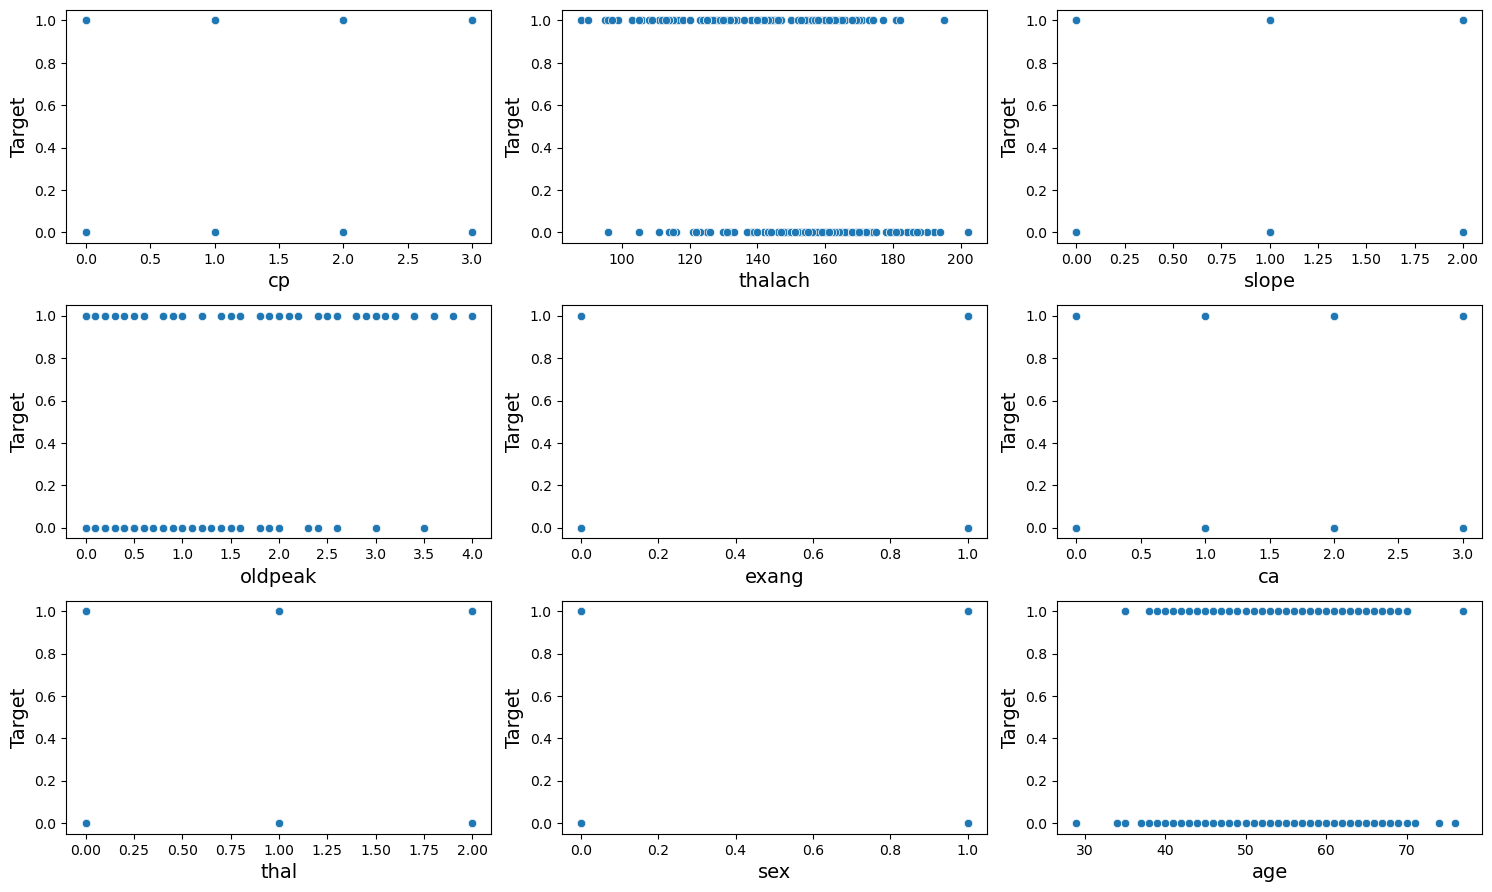

In [137]:
# Informasi variabel ke target
fig = plt.figure(figsize=(15,9))
for index in range(len(analyze.columns)):
    plt.subplot(3,3,index + 1)
    sns.scatterplot(x = analyze.iloc[:,index],y=df.target,data = analyze)
    plt.xlabel(analyze.columns[index], fontsize=14)
    plt.ylabel("Target", fontsize=14)

fig.tight_layout(pad = 1.0)

### Scalling

Scaling adalah suatu cara untuk membuat numerical data pada dataset memiliki rentang nilai (scale) yang sama. Tidak ada lagi satu variabel data yang mendominasi variabel data lainnya.

In [140]:
X = df[['cp', 'thalach', 'slope', 'oldpeak', 'exang', 'ca', 'thal', 'sex', 'age']]
y = df['target']

In [142]:
# Mendefinisikan standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# # Perform PCA for dimensionality reduction
# feature_number = len(X_scaled[0])
# pca = PCA(n_components=feature_number)

# # Fit PCA with dataset
# pca.fit(X_scaled)

# # Get variance information
# variance_ratio = pca.explained_variance_ratio_

# # Calculate cummulative
# cumulative_variance = np.cumsum(variance_ratio)

# # Create Scree Plot
# plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
# plt.xlabel('Komponen Utama ke-')
# plt.ylabel('Varians (Nilai Eigen)')
# plt.title('Scree Plot')
# plt.show()

In [56]:
# feature_names = df.drop('target', axis=1).columns.to_list()
# component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

# for component, component_name in zip(pca.components_, component_names):
#     feature_indices = component.argsort()[::-1]
#     retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
#     print(f"{component_name}: {retained_features}")

In [57]:
# pca = PCA(n_components=9)
# heart_data_reduced = pca.fit_transform(X_scaled)

# Data Split

In [144]:
# Mendefinisikan pemisahan data
X_train, X_test, y_train, y_test = train_test_split(X_scaled , y, test_size=0.2, random_state=42)

# Menampilkan hasil pemisahan berdasarkan kolom dan baris
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(232, 9)
(59, 9)
(232,)
(59,)


In [146]:
X_test.shape

(59, 9)

# Model Training

### Logistic Regression Model

In [150]:
clf = LogisticRegression()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Logistric Regression Classifier is ", accuracy_score(y_test,y_pred))

The test accuracy score of Logistric Regression Classifier is  0.7627118644067796


In [152]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.714286  0.937500  0.810811        32
           1   0.882353  0.555556  0.681818        27

    accuracy                       0.762712        59
   macro avg   0.798319  0.746528  0.746314        59
weighted avg   0.791198  0.762712  0.751780        59



### Decision Tree Model

In [155]:
clf = DecisionTreeClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Decision Tree Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Decision Tree Classifier is  0.7457627118644068


In [157]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.729730  0.843750  0.782609        32
           1   0.772727  0.629630  0.693878        27

    accuracy                       0.745763        59
   macro avg   0.751229  0.736690  0.738243        59
weighted avg   0.749407  0.745763  0.742003        59



### Random Forest Model

In [160]:
clf = RandomForestClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of Random Forest Classifier is ", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest Classifier is  0.7796610169491526


In [161]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.720930  0.968750  0.826667        32
           1   0.937500  0.555556  0.697674        27

    accuracy                       0.779661        59
   macro avg   0.829215  0.762153  0.762171        59
weighted avg   0.820038  0.779661  0.767636        59



### MPL Classifier Model

In [163]:
clf = MLPClassifier()
# train the classifier
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# printing the test accuracy
print("The test accuracy score of MLP Classifier is ", accuracy_score(y_test,y_pred))

The test accuracy score of MLP Classifier is  0.7796610169491526


In [166]:
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.720930  0.968750  0.826667        32
           1   0.937500  0.555556  0.697674        27

    accuracy                       0.779661        59
   macro avg   0.829215  0.762153  0.762171        59
weighted avg   0.820038  0.779661  0.767636        59



# Hyperparameter Tuning

Tuning menggunakan score: roc-auc

### Logistic Regression Model

In [169]:
# Logistic regression classifier with hyperparameter
clf = LogisticRegression()

param_grid = {
    'max_iter': [100, 200, 300],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

gs1 = GridSearchCV(
        estimator= clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_lg = gs1.fit(X_train, y_train)

print(fit_clf_lg.best_params_)
print(fit_clf_lg.best_score_)

{'max_iter': 100, 'multi_class': 'auto', 'solver': 'lbfgs'}
0.9262930402930403


In [170]:
y_pred = fit_clf_lg.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.714286  0.937500  0.810811        32
           1   0.882353  0.555556  0.681818        27

    accuracy                       0.762712        59
   macro avg   0.798319  0.746528  0.746314        59
weighted avg   0.791198  0.762712  0.751780        59



### Decision Tree Model

In [173]:
# Decision Tree classifier with hyperparameter
clf = DecisionTreeClassifier()

param_grid = {'min_samples_leaf': [1,2,4],
               'max_depth': [None, '10', '20', '30'],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_dt = gs1.fit(X_train, y_train)

print(fit_clf_dt.best_params_)
print(fit_clf_dt.best_score_)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4}
0.8914761904761905


In [175]:
y_pred = fit_clf_dt.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.666667  0.875000  0.756757        32
           1   0.764706  0.481481  0.590909        27

    accuracy                       0.694915        59
   macro avg   0.715686  0.678241  0.673833        59
weighted avg   0.711532  0.694915  0.680860        59



### Random Forest Model

In [177]:
# Random Forest classifier with hyperparameter
clf = RandomForestClassifier()

param_grid = {'n_estimators': [100, 200, 300],
               'max_depth': [None, 10, 20, 30, 40],
               'criterion': ['gini', 'entropy']}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_rf = gs1.fit(X_train, y_train)

print(fit_clf_rf.best_params_)
print(fit_clf_rf.best_score_)

{'criterion': 'entropy', 'max_depth': 30, 'n_estimators': 100}
0.9321648351648351


In [178]:
y_pred = fit_clf_rf.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.704545  0.968750  0.815789        32
           1   0.933333  0.518519  0.666667        27

    accuracy                       0.762712        59
   macro avg   0.818939  0.743634  0.741228        59
weighted avg   0.809245  0.762712  0.747547        59



### MPL Classifier Model

In [184]:
# MLP Classifier with hyperparameter
clf = MLPClassifier()

param_grid1 = {'hidden_layer_sizes': [(100,),(100,50),(100, 100, 100)],
               'activation': ['logistic', 'tanh', 'relu'],
               'solver': ['sgd', 'adam' ]}

gs1 = GridSearchCV(
        estimator=clf,
        param_grid = param_grid1,
        cv=5,
        n_jobs=-1,
        scoring='roc_auc'
    )

fit_clf_mlp = gs1.fit(X_train, y_train)

print(fit_clf_mlp.best_params_)
print(fit_clf_mlp.best_score_)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}
0.9352087912087912


In [185]:
y_pred = fit_clf_mlp.predict(X_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.704545  0.968750  0.815789        32
           1   0.933333  0.518519  0.666667        27

    accuracy                       0.762712        59
   macro avg   0.818939  0.743634  0.741228        59
weighted avg   0.809245  0.762712  0.747547        59



# Model Evaluation

Menggunakan ROC Analysis: Kurva yang menyajikan ilustrasi performansi dari binary classifier system dalam menghasilkan sebuah prediksi

In [187]:
# Predict the probabilities for the positive class
y_pred_logreg = fit_clf_lg.predict_proba(X_test)[:,1]
y_pred_rf = fit_clf_rf.predict_proba(X_test)[:,1]
y_pred_dt= fit_clf_dt.predict_proba(X_test)[:,1]
y_pred_mlp= fit_clf_mlp.predict_proba(X_test)[:,1]

# Calculate the AUC-ROC scores
auc_logreg = roc_auc_score(y_test, y_pred_logreg)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_dt = roc_auc_score(y_test, y_pred_dt)
auc_mlp = roc_auc_score(y_test, y_pred_mlp)

print(f"AUC-ROC for Logistic Regression: {auc_logreg}")
print(f"AUC-ROC for Random Forest: {auc_rf}")
print(f"AUC-ROC for Decision Tree: {auc_dt}")
print(f"AUC-ROC for MLP: {auc_mlp}")

AUC-ROC for Logistic Regression: 0.8032407407407407
AUC-ROC for Random Forest: 0.787037037037037
AUC-ROC for Decision Tree: 0.7349537037037037
AUC-ROC for MLP: 0.8020833333333334


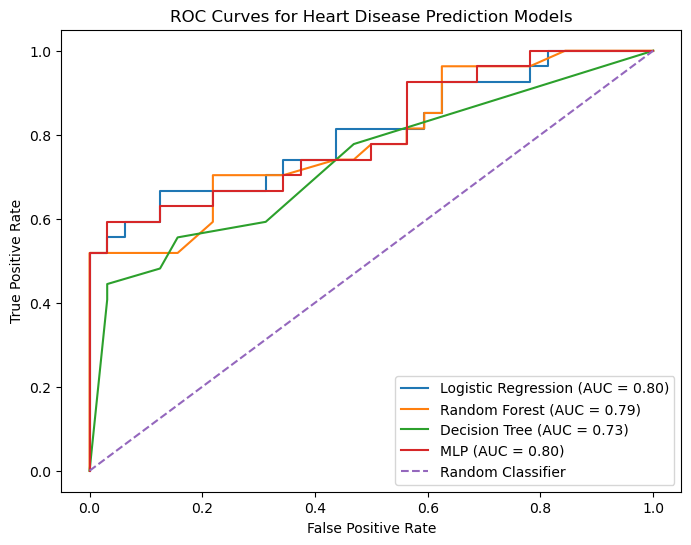

In [188]:
#Membuat ROC Analisis
def plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
    fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_mlp)

    # Plot ROC curves
    plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
    plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
    plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})')
    plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.2f})')

    # Plot random classifier
    plt.plot([0,1],[0,1], linestyle='--', label='Random Classifier')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Heart Disease Prediction Models')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_logreg, y_pred_rf, y_pred_dt, y_pred_mlp)

In [189]:
def find_rates_for_thresholds(y_pred, y_test, thresholds):
    fpr_list = []
    tpr_list = []
    for threshold in thresholds:
        y_pred_binary = (y_pred > threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred_binary).ravel()
        fpr = fp / (fp + tn)
        tpr = tp / (tp + fn)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    return fpr_list, tpr_list

thresholds = np.arange(0, 1.1, 0.1)

fpr_logreg, tpr_logreg = find_rates_for_thresholds(y_pred_logreg, y_test, thresholds)
fpr_rf, tpr_rf = find_rates_for_thresholds(y_pred_rf, y_test, thresholds)
fpr_dt, tpr_dt = find_rates_for_thresholds(y_pred_dt, y_test, thresholds)
fpr_mlp, tpr_mlp = find_rates_for_thresholds(y_pred_mlp,y_test, thresholds)

summary_df = pd.DataFrame({
    'Threshold' : thresholds,
    'Logistic Regression FPR' : fpr_logreg,
    'Logistic Regression TPR' : tpr_logreg,
    'Random Forest FPR' : fpr_rf,
    'Random Forest TPR' : tpr_rf,
    'Decision Tree FPR' : fpr_dt,
    'Decision Tree TPR' : tpr_dt,
    'MLP FPR' : fpr_mlp,
    'MLP TPR' : tpr_mlp

})

summary_df

,Threshold,Logistic Regression FPR,Logistic Regression TPR,Random Forest FPR,Random Forest TPR,Decision Tree FPR,Decision Tree TPR,MLP FPR,MLP TPR
0,0.0,1.00000,1.000000,0.87500,1.000000,0.46875,0.777778,1.00000,1.000000
1,0.1,0.43750,0.814815,0.65625,0.962963,0.46875,0.777778,0.46875,0.740741
2,0.2,0.31250,0.666667,0.53125,0.777778,0.46875,0.777778,0.34375,0.666667
3,0.3,0.12500,0.666667,0.21875,0.703704,0.31250,0.592593,0.15625,0.629630
4,0.4,0.12500,0.592593,0.12500,0.518519,0.15625,0.555556,0.12500,0.592593
5,0.5,0.06250,0.555556,0.03125,0.518519,0.12500,0.481481,0.03125,0.518519
6,0.6,0.03125,0.555556,0.00000,0.518519,0.12500,0.481481,0.00000,0.518519
7,0.7,0.00000,0.444444,0.00000,0.407407,0.12500,0.481481,0.00000,0.518519
8,0.8,0.00000,0.444444,0.00000,0.370370,0.03125,0.407407,0.00000,0.481481
9,0.9,0.00000,0.296296,0.00000,0.259259,0.03125,0.407407,0.00000,0.333333


In [190]:
def find_best_threshold(y_test, y_pred):
    # based on Youden's Index
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    #calculate Youden's Index
    youden_index = tpr - fpr

    #ambil indeks tresholds terbaik
    optimal_idx = np.argmax(youden_index)
    return thresholds[optimal_idx]

best_threshold_logreg = find_best_threshold(y_test, y_pred_logreg)
best_threshold_rf = find_best_threshold(y_test, y_pred_rf)
best_threshold_dt = find_best_threshold(y_test, y_pred_dt)
best_threshold_mlp = find_best_threshold(y_test, y_pred_mlp)

print(f"Best threshold for Logistic Regression: {best_threshold_logreg}")
print(f"Best threshold for Random Forest: {best_threshold_rf}")
print(f"Best threshold for Decision Tree: {best_threshold_dt}")
print(f"Best threshold for MLP: {best_threshold_mlp}")

Best threshold for Logistic Regression: 0.30319824154851155
Best threshold for Random Forest: 0.66
Best threshold for Decision Tree: 0.8
Best threshold for MLP: 0.4741325108897713


**Ingat**

1. Jika kita menginginkan model yang memiliki sensitivitas yang tinggi, yaitu kemampuan untuk mendeteksi sebanyak mungkin kasus positif (True Positive), maka lebih baik menggunakan treshold yang lebih rendah. Namun, ini mungkin juga akan menyebabkan peningkatan False Positive Rate (kasus negatif yang salah diprediksi positif).
2. Sebaliknya, jika kita ingin mengurangi kesalahan dalam memprediksi kasus negatif sebagai positif (False Positive), maka kita akan memilih treshold yang lebih tinggi. Namun, ini dapat mengurangi sensitivitas model (menyebabkan lebih banyak True Negative yang salah diprediksi negatif).

Jadi dapat disimpulkan, bahwa model yang peformanya lebih bagus ialah model Random Forest dengan ditandai dengan model Random Forest yang memiliki nilai akurasi pada classification report tertinggi, yaitu sebesar 82% dan Model Random Forest memiliki score AUC-ROC Terbesar dibandingkan 3 model lainnya, yaitu sebesar 90%, namun model ini memiliki treshold yang tinggi dimana akan meningkatkan FPR (Kasus negatif yang salah diprediksi positif).

**Cross Validation**

In [191]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
model = fit_clf_lg
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print('mean:', cv_scores.mean())
print('std:', cv_scores.std())

Cross-Validation Scores: [0.83796296 0.90384615 0.91586538 0.94591346 0.88942308]
mean: 0.898602207977208
std: 0.03556752854011957


In [192]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
model = fit_clf_dt
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print('mean:', cv_scores.mean())
print('std:', cv_scores.std())

Cross-Validation Scores: [0.7962963  0.7421875  0.86838942 0.75       0.85997596]
mean: 0.8033698361823362
std: 0.053053657271018226


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
model = fit_clf_rf
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print('mean:', cv_scores.mean())
print('std:', cv_scores.std())

In [220]:
cv = StratifiedKFold(n_splits=5, shuffle=True)
model = fit_clf_mlp
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='roc_auc')
print("Cross-Validation Scores:", cv_scores)
print('mean:', cv_scores.mean())
print('std:', cv_scores.std())

Cross-Validation Scores: [0.89814815 0.91105769 0.90985577 0.74759615 0.91346154]
mean: 0.8760238603988604
std: 0.06443090421677009


# Export Model

In [196]:
# Menyimpan model terbaik dengan pickle
pklname = 'model.pkl'
model = fit_clf_mlp
with open(pklname, 'wb') as file:
    pickle.dump(model,file)

In [198]:
joblib.dump(model, 'model.joblib')

['model.joblib']

# Import Model

In [212]:
with open("model.pkl", "rb") as file:
    model = pickle.load(file)

In [214]:
model = model.best_estimator_
model

MLPClassifier()

model = MLPClassifier()
hyperparams = {'activation': 'relu', 
               'hidden_layer_sizes': (100,), 
               'solver': 'adam'}

# Data Prediction

In [216]:
def model_summary(model, data_test, data_pred, label):
    print(classification_report(data_test, data_pred, target_names=label, digits=6))
    
    cMatrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(data_test, data_pred),
                                 display_labels=label)
    cMatrix.plot(cmap='Blues')
    plt.plot()
    plt.xticks(rotation=90)
    plt.title('Confusion Matrix')

              precision    recall  f1-score   support

     Disease   0.704545  0.968750  0.815789        32
  No disease   0.933333  0.518519  0.666667        27

    accuracy                       0.762712        59
   macro avg   0.818939  0.743634  0.741228        59
weighted avg   0.809245  0.762712  0.747547        59



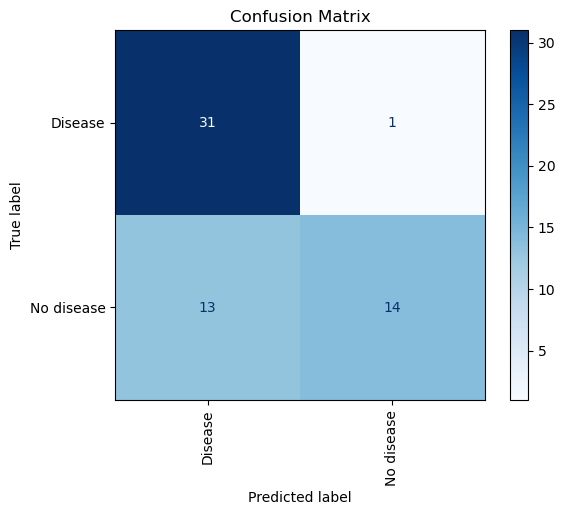

In [218]:
y_pred = model.predict(X_test)
model_summary(model, y_test, y_pred, encoder[y.name].classes_)